In [1]:
%run ../scripts/notebook_settings.py
import glob

Performing some checks to explore the metadata.

In [2]:
table_desc = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"

In [3]:
metadata_table = pd.read_csv(table_desc, sep="\t")
metadata_table.columns

Index(['ID', 'ID_PGDP', 'group', 'family', 'genus', 'species', 'subspecies',
       'species_full', 'species_short', 'species_genotyping', 'reference',
       'SEX', 'len_chrA', 'len_chrA_contigs_shorter_than_1Mb', 'len_chrX',
       'len_chrX_contigs_shorter_than_1Mb', 'len_chrY',
       'len_chrY_contigs_shorter_than_1Mb', 'total_seq_chrA', 'total_seq_chrX',
       'total_seq_chrY', 'len_cov_chrA', 'len_cov_chrX', 'len_cov_chrY',
       'frac_cov_chrA', 'frac_cov_chrX', 'frac_cov_chrY', 'frac_cov_gw',
       'rel_frac_cov_YX', 'nonN_frac', 'frac_cov_gw_cor', 'threshold',
       'threshold_chrX', 'good_frac_cov', 'cov_chrA', 'cov_chrX', 'cov_chrY',
       'cov_gw', 'rel_cov_chrX', 'gSEX', 'gSEX_source', 'callable_chrA',
       'callable_chrX', 'GT00_chrA', 'GT01_chrA', 'GT11_chrA', 'GTmis_chrA',
       'GT00_chrX', 'GT0_chrX', 'GT01_chrX', 'GT11_chrX', 'GT1_chrX',
       'GTmis_chrX', 'het_chrA', 'het_chrX', 'rel_chrX_het', 'hom_alt_chrA',
       'hom_alt_chrX', 'hem_alt_chrX', 'rel_c

In [4]:
len(metadata_table), metadata_table.gSEX_source.unique()

(3240, array(['chrX', 'metadata', 'default', 'chrY'], dtype=object))

In [5]:
len(metadata_table.species.unique())

256

In [6]:
metadata_20x_filt = metadata_table.loc[(metadata_table.finalQC != "fail")
                              & (metadata_table.cov_chrA >= 20)
                              & (metadata_table.remove_as_relative != True)
                              & (metadata_table.remove_manual != True)
                              & (~metadata_table.ID.str.startswith("SAMEA11633"))
                             ]
# Can get six more species if you use cov >= 10, but probably not worth the effort
len(metadata_20x_filt.species.unique()), len(metadata_20x_filt)

(240, 1390)

In [7]:
metadata_20x_filt.species_genotyping.value_counts()

species_genotyping
Macaca_fascicularis_ssp        132
Macaca_mulatta_ssp             103
Papio_anubis_ssp                96
Pan_troglodytes_ssp             94
Papio_cynocephalus_ssp          70
                              ... 
Microcebus_griseorufus_ssp       1
Microcebus_jonahi_ssp            1
Microcebus_mittermeieri_ssp      1
Microcebus_tavaratra_ssp         1
Cercocebus_lunulatus_ssp         1
Name: count, Length: 251, dtype: int64

[(-1.0, 40.0)]

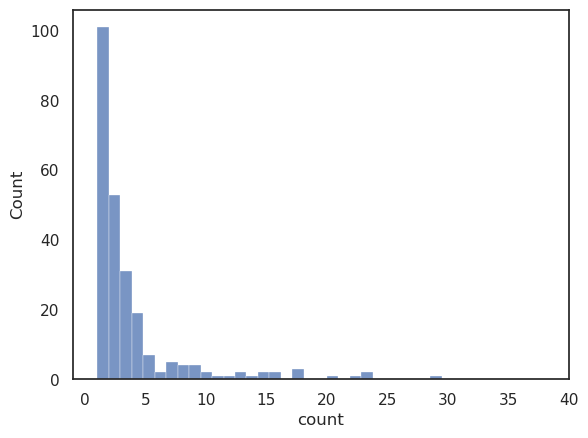

In [8]:
# Set lim below 40 to see the distribution of most species better.
g = sns.histplot(metadata_20x_filt.species_genotyping.value_counts())
g.set(xlim=(-1, 40))

In [9]:
# The species that are thrown out even though they have a 20x individual, but fail the other criteria.
metadata_table.loc[(~metadata_table.species.isin(metadata_20x_filt.species.unique())) & (metadata_table.cov_chrA >= 20)]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
199,SAMN11334319,SAMN11334319,STR,Cheirogaleidae,Cheirogaleus,crossleyi,ssp,Cheirogaleus_crossleyi_ssp,C.crossleyi_ssp,Cheirogaleus_crossleyi_ssp,...,wrong label; correct: C.major,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,PD_0055,PD_0055,OWM,Cercopithecidae,Colobus,polykomos,ssp,Colobus_polykomos_ssp,C.polykomos_ssp,Colobus_polykomos_ssp,...,NaN,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,SAMEA116330139,SAMEA116330139,STR,Lemuridae,Eulemur,cinereiceps,ssp,Eulemur_cinereiceps_ssp,E.cinereiceps_ssp,Eulemur_cinereiceps_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,SAMEA116330175,SAMEA116330175,STR,Lemuridae,Hapalemur,aureus,ssp,Hapalemur_aureus_ssp,H.aureus_ssp,Hapalemur_aureus_ssp,...,NaN,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,PD_0160,PD_0160,STR,Lemuridae,Hapalemur,occidentalis,ssp,Hapalemur_occidentalis_ssp,H.occidentalis_ssp,Hapalemur_occidentalis_ssp,...,NaN,fail,PASS,WARN,NaN,NaN,NaN,NaN,NaN,NaN
1593,SAMEA116330194,SAMEA116330194,STR,Lepilemuridae,Lepilemur,sahamalazensis,ssp,Lepilemur_sahamalazensis_ssp,L.sahamalazensis_ssp,Lepilemur_sahamalazensis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2737,PD_0083,PD_0083,PLA,Pitheciidae,Pithecia,pissinatti,ssp,Pithecia_pissinatti_ssp,P.pissinatti_ssp,Pithecia_pissinatti_ssp,...,NaN,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2738,PD_0144,PD_0144,PLA,Pitheciidae,Pithecia,pissinatti,ssp,Pithecia_pissinatti_ssp,P.pissinatti_ssp,Pithecia_pissinatti_ssp,...,NaN,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2739,PD_0331,PD_0331,PLA,Pitheciidae,Pithecia,pissinatti,ssp,Pithecia_pissinatti_ssp,P.pissinatti_ssp,Pithecia_pissinatti_ssp,...,NaN,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,SAMEA116330132,SAMEA116330132,STR,Indriidae,Avahi,occidentalis,ssp,Avahi_occidentalis_ssp,A.occidentalis_ssp,Avahi_occidentalis_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Number of species after filtering.
count_sub = metadata_20x_filt[["gSEX", "species"]].value_counts().reset_index()
len(count_sub.species.unique()), len(count_sub.loc[(count_sub.gSEX == "M") & (count_sub["count"] == 1)])

(240, 92)

In [11]:
# Number of species with at least 2 X haplotypes (that is, at least one female or 2+ males)
len(count_sub.loc[(count_sub.gSEX == "F") | ((count_sub.gSEX == "M") & (count_sub["count"] >= 2))].species.unique())

193

So after filtering, there are 166 species with at least one female in which you can determine chromosome X.
Adding samples with more than 1 male, we reach 193 (and assuming a present chrX). The last species only have a single male (or no identified females).

In [12]:
metadata_20x_filt.loc[metadata_20x_filt.genus == "Gorilla"]#.species_full.unique()

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
495,SAMEA2697037,SAMEA2697037,APE,Hominidae,Gorilla,beringei,beringei,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,SAMEA2697039,SAMEA2697039,APE,Hominidae,Gorilla,beringei,beringei,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,SAMEA3939556,SAMEA3939556,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,SAMEA3939557,SAMEA3939557,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,SAMEA3939558,SAMEA3939558,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,SAMEA3939560,SAMEA3939560,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,SAMEA3939561,SAMEA3939561,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,SAMEA3991715,SAMEA3991715,APE,Hominidae,Gorilla,beringei,ssp,Gorilla_beringei_beringei,G.beringei_beringei,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,SAMEA2697040,SAMEA2697040,APE,Hominidae,Gorilla,beringei,graueri,Gorilla_beringei_graueri,G.beringei_graueri,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,SAMEA2697041,SAMEA2697041,APE,Hominidae,Gorilla,beringei,graueri,Gorilla_beringei_graueri,G.beringei_graueri,Gorilla_beringei_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
